In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [11]:
df = pd.read_csv('Customer Purchasing Behaviors.csv')
# print(df.info())
df = df.drop(columns=['user_id', 'region'])
# normalize the data
df = (df - df.mean()) / df.std()

In [12]:
print(df.describe())

                age  annual_income  purchase_amount  loyalty_score  \
count  2.380000e+02   2.380000e+02     2.380000e+02   2.380000e+02   
mean  -3.022792e-16   2.015195e-16     9.702789e-17   2.612289e-17   
std    1.000000e+00   1.000000e+00     1.000000e+00   1.000000e+00   
min   -1.783366e+00  -2.403355e+00    -1.968056e+00  -1.997906e+00   
25%   -8.209147e-01  -6.495654e-01    -7.542213e-01  -6.814564e-01   
50%    3.459794e-02   1.396400e-01     1.026029e-01   1.084135e-01   
75%    8.633758e-01   8.192335e-01     7.273706e-01   7.798030e-01   
max    1.745623e+00   1.542672e+00     1.530643e+00   1.424863e+00   

       purchase_frequency  
count        2.380000e+02  
mean        -1.716647e-16  
std          1.000000e+00  
min         -2.147396e+00  
25%         -6.132786e-01  
50%          4.420026e-02  
75%          7.016791e-01  
max          1.797477e+00  


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 238 non-null    float64
 1   annual_income       238 non-null    float64
 2   purchase_amount     238 non-null    float64
 3   loyalty_score       238 non-null    float64
 4   purchase_frequency  238 non-null    float64
dtypes: float64(5)
memory usage: 9.4 KB
None


[4.93984960e+00 2.55523224e-02 3.52716686e-03 1.82137114e-02
 1.28572030e-02]
[[ 0.44571503  0.75799949 -0.09380735 -0.45831704  0.08899755]
 [ 0.44598537 -0.63786809  0.06947161 -0.61548897  0.10280257]
 [ 0.44886872  0.0560552   0.81778279  0.3447678  -0.08798387]
 [ 0.44789507 -0.08344125 -0.42113493  0.23870955 -0.74705467]
 [ 0.44759585 -0.09195891 -0.37450041  0.48504817  0.6447319 ]]


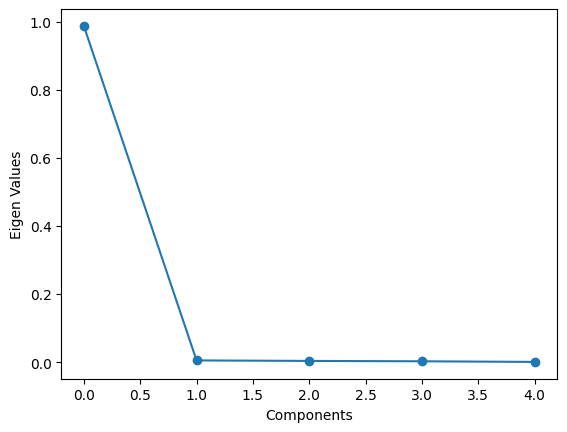

In [26]:
# perform PCA on the data
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
#  #   Column              Non-Null Count  Dtype  
# ---  ------              --------------  -----  
#  0   user_id             238 non-null    int64  
#  1   age                 238 non-null    int64  
#  2   annual_income       238 non-null    int64  
#  3   purchase_amount     238 non-null    int64  
#  4   loyalty_score       238 non-null    float64
#  5   region              238 non-null    object 
#  6   purchase_frequency  238 non-null    int64  

# # print the eigen values of the covariance matrix
pca.fit(df[['age', 'annual_income', 'purchase_amount', 'loyalty_score', 'purchase_frequency']])

# # Make a line graph of the eigen values in decreasing order
plt.plot(pca.explained_variance_ratio_)
# y axis label as Eigen Values
plt.ylabel('Eigen Values')
# x axis label as Components
plt.xlabel('Components')
# # make dots for each eigen value

plt.scatter(range(0, len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)

covariance_matrix = np.cov(df[['age', 'annual_income', 'purchase_amount', 'loyalty_score', 'purchase_frequency']].T)

# print the eigen values of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print(eigenvalues)
print(eigenvectors)




        PC1       PC2       PC3
0 -3.166315 -0.246945  0.332820
1 -0.687301 -0.247482 -0.007677
2  1.337074  0.020316  0.151006
3 -4.606151  0.435093 -0.099554
4 -2.664490 -0.059905  0.443565


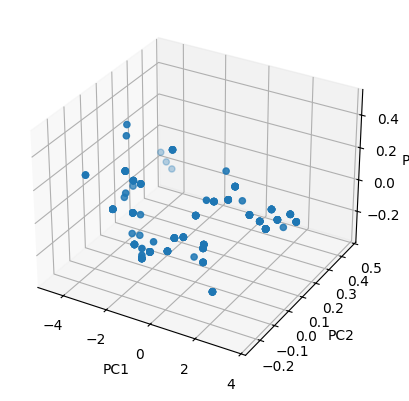

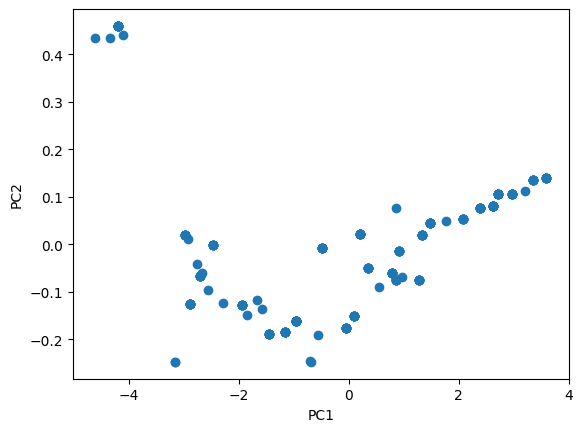

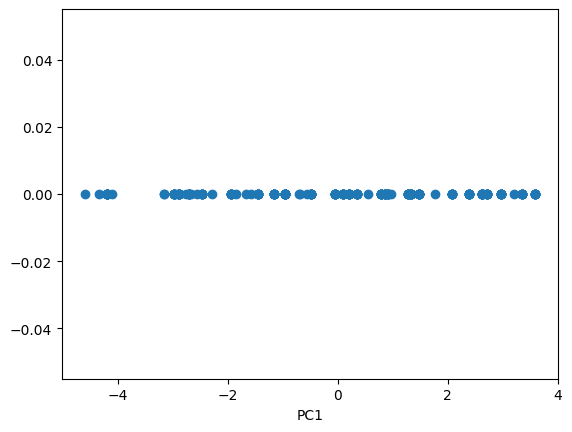

In [25]:
# project the data into the new space
pca = PCA(n_components=3)
pca.fit(df[['age', 'annual_income', 'purchase_amount', 'loyalty_score', 'purchase_frequency']])
df_pca = pca.transform(df[['age', 'annual_income', 'purchase_amount', 'loyalty_score', 'purchase_frequency']])
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'])
print(df_pca.head())
# plot the data points in the new space in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# plot the data points in the new space in 1D
plt.scatter(df_pca['PC1'], np.zeros(df_pca.shape[0]))
plt.xlabel('PC1')
plt.show()